In [1]:
from datasets import load_dataset
import torch

num_experts = 64

name1 = f'marsggbo/bigbench4switch{num_experts}_pattern_truncation256'
name2 = f"marsggbo/wmt16_switch{num_experts}_token_patterns"
name = name2

dataset = load_dataset(name)['train']
dataset = dataset.shuffle(5121).select(range(1000))
patterns = dataset['decode_pattern']
print(len(patterns))

patterns = torch.tensor(patterns)
patterns = patterns.permute(0, 2, 1)
print(patterns.shape)

onehot_patterns = torch.nn.functional.one_hot(patterns, num_classes=num_experts)
print(onehot_patterns.shape)


/home/nus-hx/.conda/envs/moe/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:

onehot_patterns = onehot_patterns[:, :8, ...]
print(onehot_patterns.shape)
token_patterns = onehot_patterns[64:128].sum(0)
print(token_patterns.shape)

torch.Size([32808, 8, 6, 64])
torch.Size([8, 6, 64])


In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(token_patterns, decode_indices, layer_indices, num_experts):
    num_subplots = len(decode_indices) * len(layer_indices)
    num_rows = len(decode_indices)
    num_cols = len(layer_indices)
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
    
    # 如果只有一个子图，axs 不是数组，所以需要特殊处理
    if num_subplots == 1:
        axs = np.array([axs])
    
    for i, decode_idx in enumerate(decode_indices):
        for j, layer_idx in enumerate(layer_indices):
            ax = axs[i, j] if num_subplots > 1 else axs[0]
            # 创建一个随机矩阵
            matrix = token_patterns[decode_idx] # (num_layers, num_experts)
            # 将矩阵展平为一维数组
            flat_matrix = matrix[layer_idx].flatten() # (num_experts,)
            unique_experts = torch.where(flat_matrix)[0].tolist()
            unique_numbers = len(unique_experts)
            indexes = range(num_experts)
            # 绘制直方图
            ax.bar(indexes, flat_matrix, color='blue', edgecolor='black')
            # 添加标题和标签
            ax.set_title(f'Decode {decode_idx}, Layer {layer_idx} #Experts {unique_numbers}')
            ax.set_xlabel('Values')
            ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


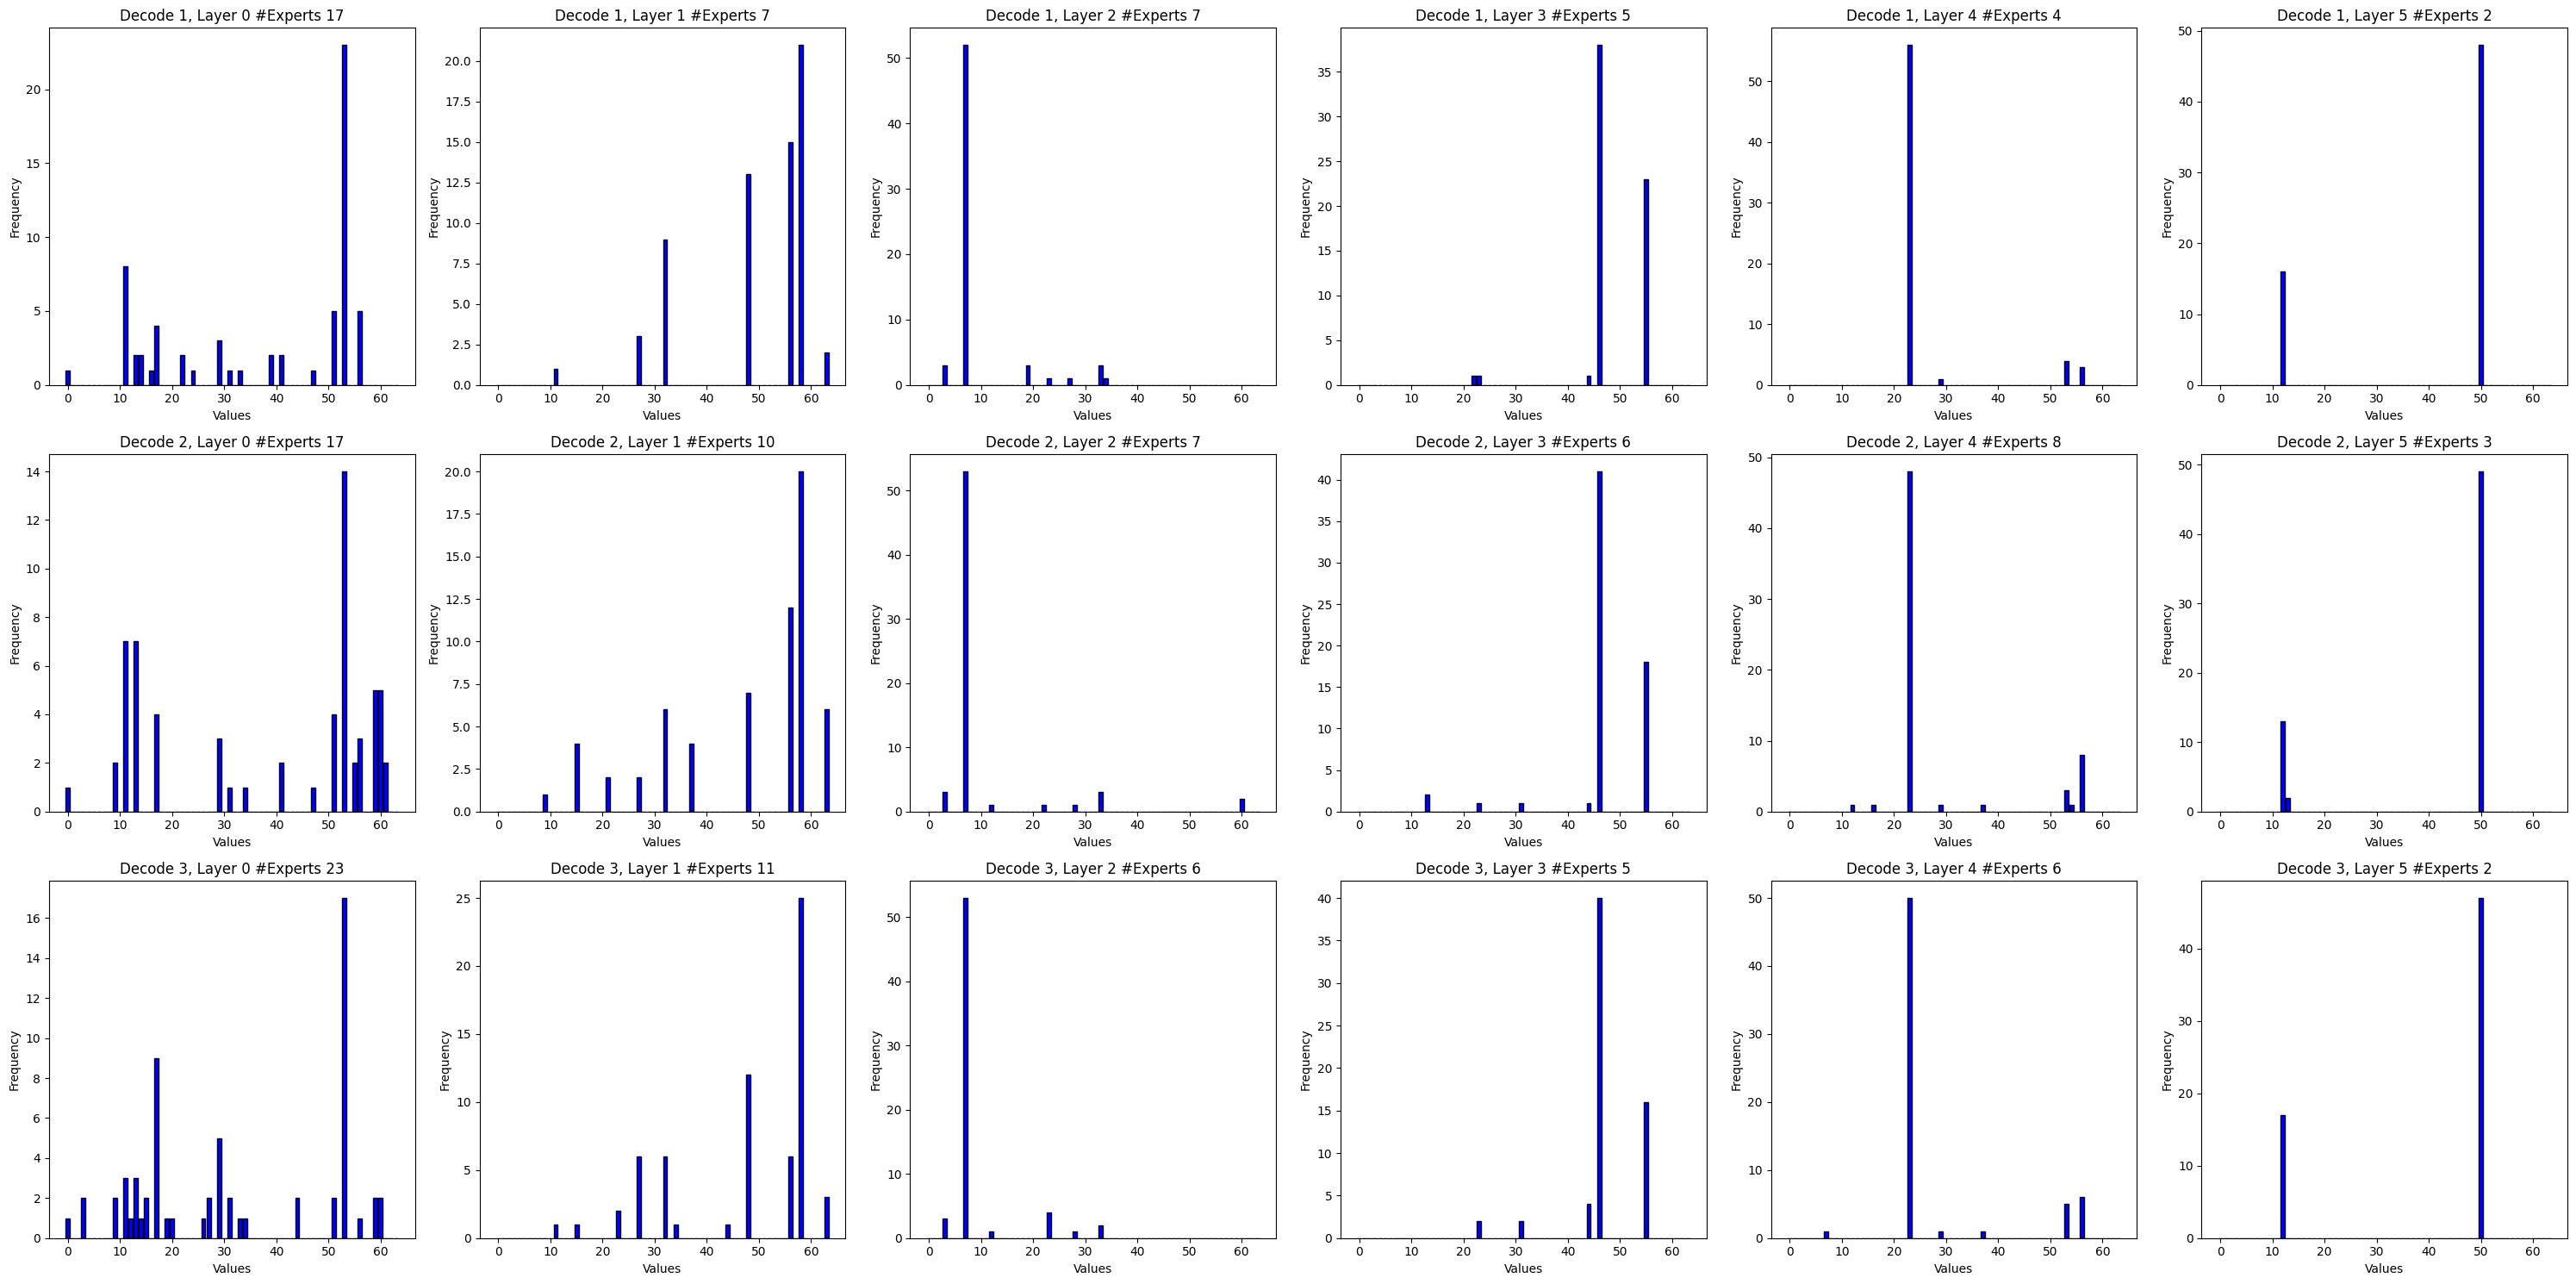

In [50]:

# 示例调用
decode_indices = [1,2,3]  # decode 维度的索引列表
layer_indices = [0, 1, 2,3,4,5]  # layer 维度的索引列表
plot_histogram(token_patterns, decode_indices, layer_indices, num_experts)